# July 2019 Democratic Debate: NLP Part 2

This is part 2 of my analysis of the July 2019 Democratic Debate. In the first step, I brought in the text transcripts of the debates and did some basic data cleaning. In this step We'll visualize some descriptive aspects of their transcripts. We'll also consider what these words could mean for the candidates' brand and the overall 2020 Election.

## a. Importing data

From the last part I 'pickled' my newly cleaned dataset and my Document-Text Matrix (DTM) file. I'm going to use these to further process them for stemming, lemmatization, and bi-/tri-grams.

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import pprint
import string
import pickle
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
DD1_dtm = pd.read_pickle('.\\pickle\\DD1_dtm.pkl')
DD1_dtm = DD1_dtm.transpose()
DD1_dtm.head()

Name       Amy Klobuchar  Bernie Sanders  Beto O’Rourke  Dana Bash  Don Lemon  \
abide                  0               0              0          0          1   
ability                0               0              0          0          0   
able                   0               0              2          0          0   
abolition              0               0              0          0          0   
abroad                 0               0              1          0          0   

Name       Elizabeth Warren  Jake Tapper  John Delaney  John Hickenlooper  \
abide                     0            0             0                  0   
ability                   2            0             0                  0   
able                      1            2             2                  2   
abolition                 0            0             0                  0   
abroad                    0            0             0                  0   

Name       Marianne Williamson  Pete Buttigieg  Steve Bullock  Tim Ryan  
abide                        0               0              0         0  
ability                      0               0              1         0  
able                         1               1              1         1  
abolition                    1               0              0         0  
abroad                       0               0              0         0

In [3]:
DD2_dtm = pd.read_pickle('.\\pickle\\DD2_dtm.pkl')
DD2_dtm = DD2_dtm.transpose()
DD2_dtm.head()

Name        ANDREW YANG  BILL DE BLASIO  CORY BOOKER  DANA BASH  DON LEMON  \
aberration            0               0            0          0          0   
abhorrent             0               0            0          0          0   
ability               0               0            1          0          0   
able                  1               1            0          1          0   
abroad                1               0            0          0          0   

Name        JAKE TAPPER  JAY INSLEE  JOE BIDEN  JULIAN CASTRO  KAMALA HARRIS  \
aberration            0           0          1              0              0   
abhorrent             0           0          0              0              0   
ability               1           0          2              0              0   
able                  1           0         11              3              5   
abroad                0           0          0              0              0   

Name        KIRSTEN GILLIBRAND  MICHAEL BENNET  TULSI GABBARD  
aberration                   0               0              0  
abhorrent                    0               0              1  
ability                      2               0              0  
able                         0               3              2  
abroad                       0               0              0

I should have done this earlier, but I think it makes sense to remove Dana Bash, Don Lemon and Jake Tapper from the dataset since they aren't the focus of this analysis.

In [4]:
DD1_dtm = DD1_dtm.drop(['Dana Bash', 'Don Lemon', 'Jake Tapper'], axis=1)
DD1_dtm.head()

Name       Amy Klobuchar  Bernie Sanders  Beto O’Rourke  Elizabeth Warren  \
abide                  0               0              0                 0   
ability                0               0              0                 2   
able                   0               0              2                 1   
abolition              0               0              0                 0   
abroad                 0               0              1                 0   

Name       John Delaney  John Hickenlooper  Marianne Williamson  \
abide                 0                  0                    0   
ability               0                  0                    0   
able                  2                  2                    1   
abolition             0                  0                    1   
abroad                0                  0                    0   

Name       Pete Buttigieg  Steve Bullock  Tim Ryan  
abide                   0              0         0  
ability                 0              1         0  
able                    1              1         1  
abolition               0              0         0  
abroad                  0              0         0

In [5]:
DD2_dtm = DD2_dtm.drop(['DANA BASH', 'DON LEMON', 'JAKE TAPPER'], axis=1)
DD2_dtm.columns = ['Andrew Yang', 'Bill de Blasio', 'Cory Booker', 'Jay Inslee', 'Joe Biden', 'Julian Castro', 'Kamala Harris', 'Kirsten Gillibrand', 'Michael Bennet', 'Tulsi Gabbard']
DD2_dtm.head()

Andrew Yang  Bill de Blasio  Cory Booker  Jay Inslee  Joe Biden  \
aberration            0               0            0           0          1   
abhorrent             0               0            0           0          0   
ability               0               0            1           0          2   
able                  1               1            0           0         11   
abroad                1               0            0           0          0   

            Julian Castro  Kamala Harris  Kirsten Gillibrand  Michael Bennet  \
aberration              0              0                   0               0   
abhorrent               0              0                   0               0   
ability                 0              0                   2               0   
able                    3              5                   0               3   
abroad                  0              0                   0               0   

            Tulsi Gabbard  
aberration              0  
abhorrent               1  
ability                 0  
able                    2  
abroad                  0

## b. Exploring the Transcripts

We'll go through the transcripts to get rid of more stop words or words that don't really have much meaning. Then we'll be able to create some visuals. 

In [6]:
# borrowed from adashofdata
top_dict = {}
for c in DD1_dtm.columns:
    top = DD1_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

In [7]:
# borrowed from adashofdata
for candidate, top_words in top_dict.items():
    print(candidate)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Amy Klobuchar
people, think, just, president, don, better, going, like, ve, need, yes, make, say, win
---
Bernie Sanders
people, going, healthcare, got, america, right, industry, country, insurance, companies, american, new, don, want
---
Beto O’Rourke
country, people, want, care, american, president, ve, texas, america, just, war, make, medicare, challenge
---
Elizabeth Warren
people, going, right, need, world, insurance, fight, donald, trump, say, make, companies, want, just
---
John Delaney
healthcare, right, president, medicare, private, senator, going, think, universal, country, plan, don, create, running
---
John Hickenlooper
going, got, country, ve, people, make, years, think, work, trump, donald, don, sure, just
---
Marianne Williamson
people, need, just, say, don, trump, policies, dollars, think, going, billion, fight, politics, donald
---
Pete Buttigieg
going, president, think, country, like, right, know, health, life, climate, news, school, time, ve
---
Steve Bullock
actuall

In [8]:
# borrowed from adashofdata
from collections import Counter

words = []
for candidate in DD1_dtm.columns:
    top = [word for (word, count) in top_dict[candidate]]
    for t in top:
        words.append(t)

In [9]:
# borrowed from adashofdata
Counter(words).most_common(40)

[('people', 10),
 ('going', 9),
 ('country', 9),
 ('just', 8),
 ('don', 8),
 ('ve', 8),
 ('want', 8),
 ('trump', 8),
 ('think', 7),
 ('president', 7),
 ('right', 7),
 ('like', 6),
 ('make', 6),
 ('donald', 6),
 ('american', 6),
 ('got', 5),
 ('healthcare', 5),
 ('need', 4),
 ('america', 4),
 ('insurance', 4),
 ('new', 4),
 ('medicare', 4),
 ('better', 3),
 ('say', 3),
 ('crosstalk', 3),
 ('talk', 3),
 ('jobs', 3),
 ('world', 3),
 ('win', 2),
 ('said', 2),
 ('way', 2),
 ('money', 2),
 ('thing', 2),
 ('college', 2),
 ('nra', 2),
 ('companies', 2),
 ('care', 2),
 ('day', 2),
 ('congress', 2),
 ('fight', 2)]

There are some common words that I think are interesting or important and I'll want to keep those while getting rid of the words that aren't adding much.

In [31]:
add_stop_words = ['just', 'going', 'want', 'don', 've', 'right', 'think', 'like', 'make', 'got', 'new', 'need', 'crosstalk', 'thank', 'say', 'said', 'way', 'talk', 'thing', 'president']

In [32]:
DD1_clean = pd.read_pickle('.\\pickle\\DemDebate1_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
DD1_clean_cv = cv.fit_transform(DD1_clean.Text)
DD1_clean_stop = pd.DataFrame(DD1_clean_cv.toarray(), columns=cv.get_feature_names())
DD1_clean_stop.index = DD1_clean.index

pickle.dump(cv, open("DD1_clean_stop.pkl", "wb"))
DD1_clean_stop.to_pickle("DD1_dtm_stop.pkl")

In [33]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [34]:
# borrowed form adashofdata
top_dict = {}
for c in DD2_dtm.columns:
    top = DD2_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

In [35]:
# borrowed from adashofdata
for candidate, top_words in top_dict.items():
    print(candidate)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Andrew Yang
just, right, american, applause, people, need, know, like, going, trump, start, jobs, donald, home
---
Bill de Blasio
people, going, president, working, insurance, dont, health, vice, party, say, country, american, trump, make
---
Cory Booker
president, going, trump, donald, like, people, just, im, right, want, applause, country, thats, states
---
Jay Inslee
im, need, president, proud, know, plan, believe, state, going, think, applause, weve, people, make
---
Joe Biden
fact, plan, people, president, thats, number, did, sure, know, years, make, applause, able, matter
---
Julian Castro
going, know, president, folks, dont, need, applause, believe, want, say, like, im, justice, just
---
Kamala Harris
plan, people, president, states, united, going, work, american, justice, care, families, america, need, medicare
---
Kirsten Gillibrand
president, women, people, know, trump, need, dont, want, said, make, just, family, going, im
---
Michael Bennet
country, people, make, just, appla

In [36]:
# borrowed from adashofdata
from collections import Counter

words = []
for candidate in DD2_dtm.columns:
    top = [word for (word, count) in top_dict[candidate]]
    for t in top:
        words.append(t)

In [37]:
# borrowed from adashofdata
Counter(words).most_common(40)

[('people', 10),
 ('president', 10),
 ('applause', 9),
 ('going', 9),
 ('just', 8),
 ('need', 8),
 ('trump', 8),
 ('know', 7),
 ('thats', 7),
 ('im', 6),
 ('country', 6),
 ('make', 6),
 ('right', 5),
 ('american', 5),
 ('like', 5),
 ('years', 5),
 ('care', 5),
 ('dont', 5),
 ('plan', 5),
 ('donald', 4),
 ('health', 4),
 ('did', 4),
 ('believe', 4),
 ('think', 4),
 ('home', 3),
 ('women', 3),
 ('fact', 3),
 ('insurance', 3),
 ('say', 3),
 ('justice', 3),
 ('want', 3),
 ('states', 3),
 ('united', 3),
 ('weve', 3),
 ('way', 2),
 ('theyre', 2),
 ('working', 2),
 ('vice', 2),
 ('nation', 2),
 ('thank', 2)]

In [50]:
add_stop_words = ['just', 'going', 'want', 'don', 've', 'right', 'think', 'like', 'make', 'got', 'new', 'need', 'crosstalk', 'thank', 'say', 'said', 'way', 'talk', 'thing', 'applause', 'know', 'thats', 'dont', 'did', 'president', 'im', 'ive', 'weve', 'theyre']

In [51]:
DD2_clean = pd.read_pickle('.\\pickle\\DemDebate2_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
DD2_clean_cv = cv.fit_transform(DD2_clean.Text)
DD2_clean_stop = pd.DataFrame(DD2_clean_cv.toarray(), columns=cv.get_feature_names())
DD2_clean_stop.index = DD2_clean.index

pickle.dump(cv, open("DD2_clean_stop.pkl", "wb"))
DD2_clean_stop.to_pickle("DD2_dtm_stop.pkl")

In [52]:
DD2_clean = DD2_clean.rename(index={'ANDREW YANG': 'Andrew Yang', 'BILL DE BLASIO': 'Bill de Blasio', 'CORY BOOKER': 'Cory Booker', 'JAY INSLEE': 'Jay Inslee', 'JOE BIDEN': 'Joe Biden', 'JULIAN CASTRO': 'Julian Castro',
                       'KAMALA HARRIS': 'Kamala Harris', 'KIRSTEN GILLIBRAND': 'Kirsten Gillibrand', 'MICHAEL BENNET': 'Michael Bennet', 'TULSI GABBARD': 'Tulsi Gabbard'})

In [53]:
wc2 = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

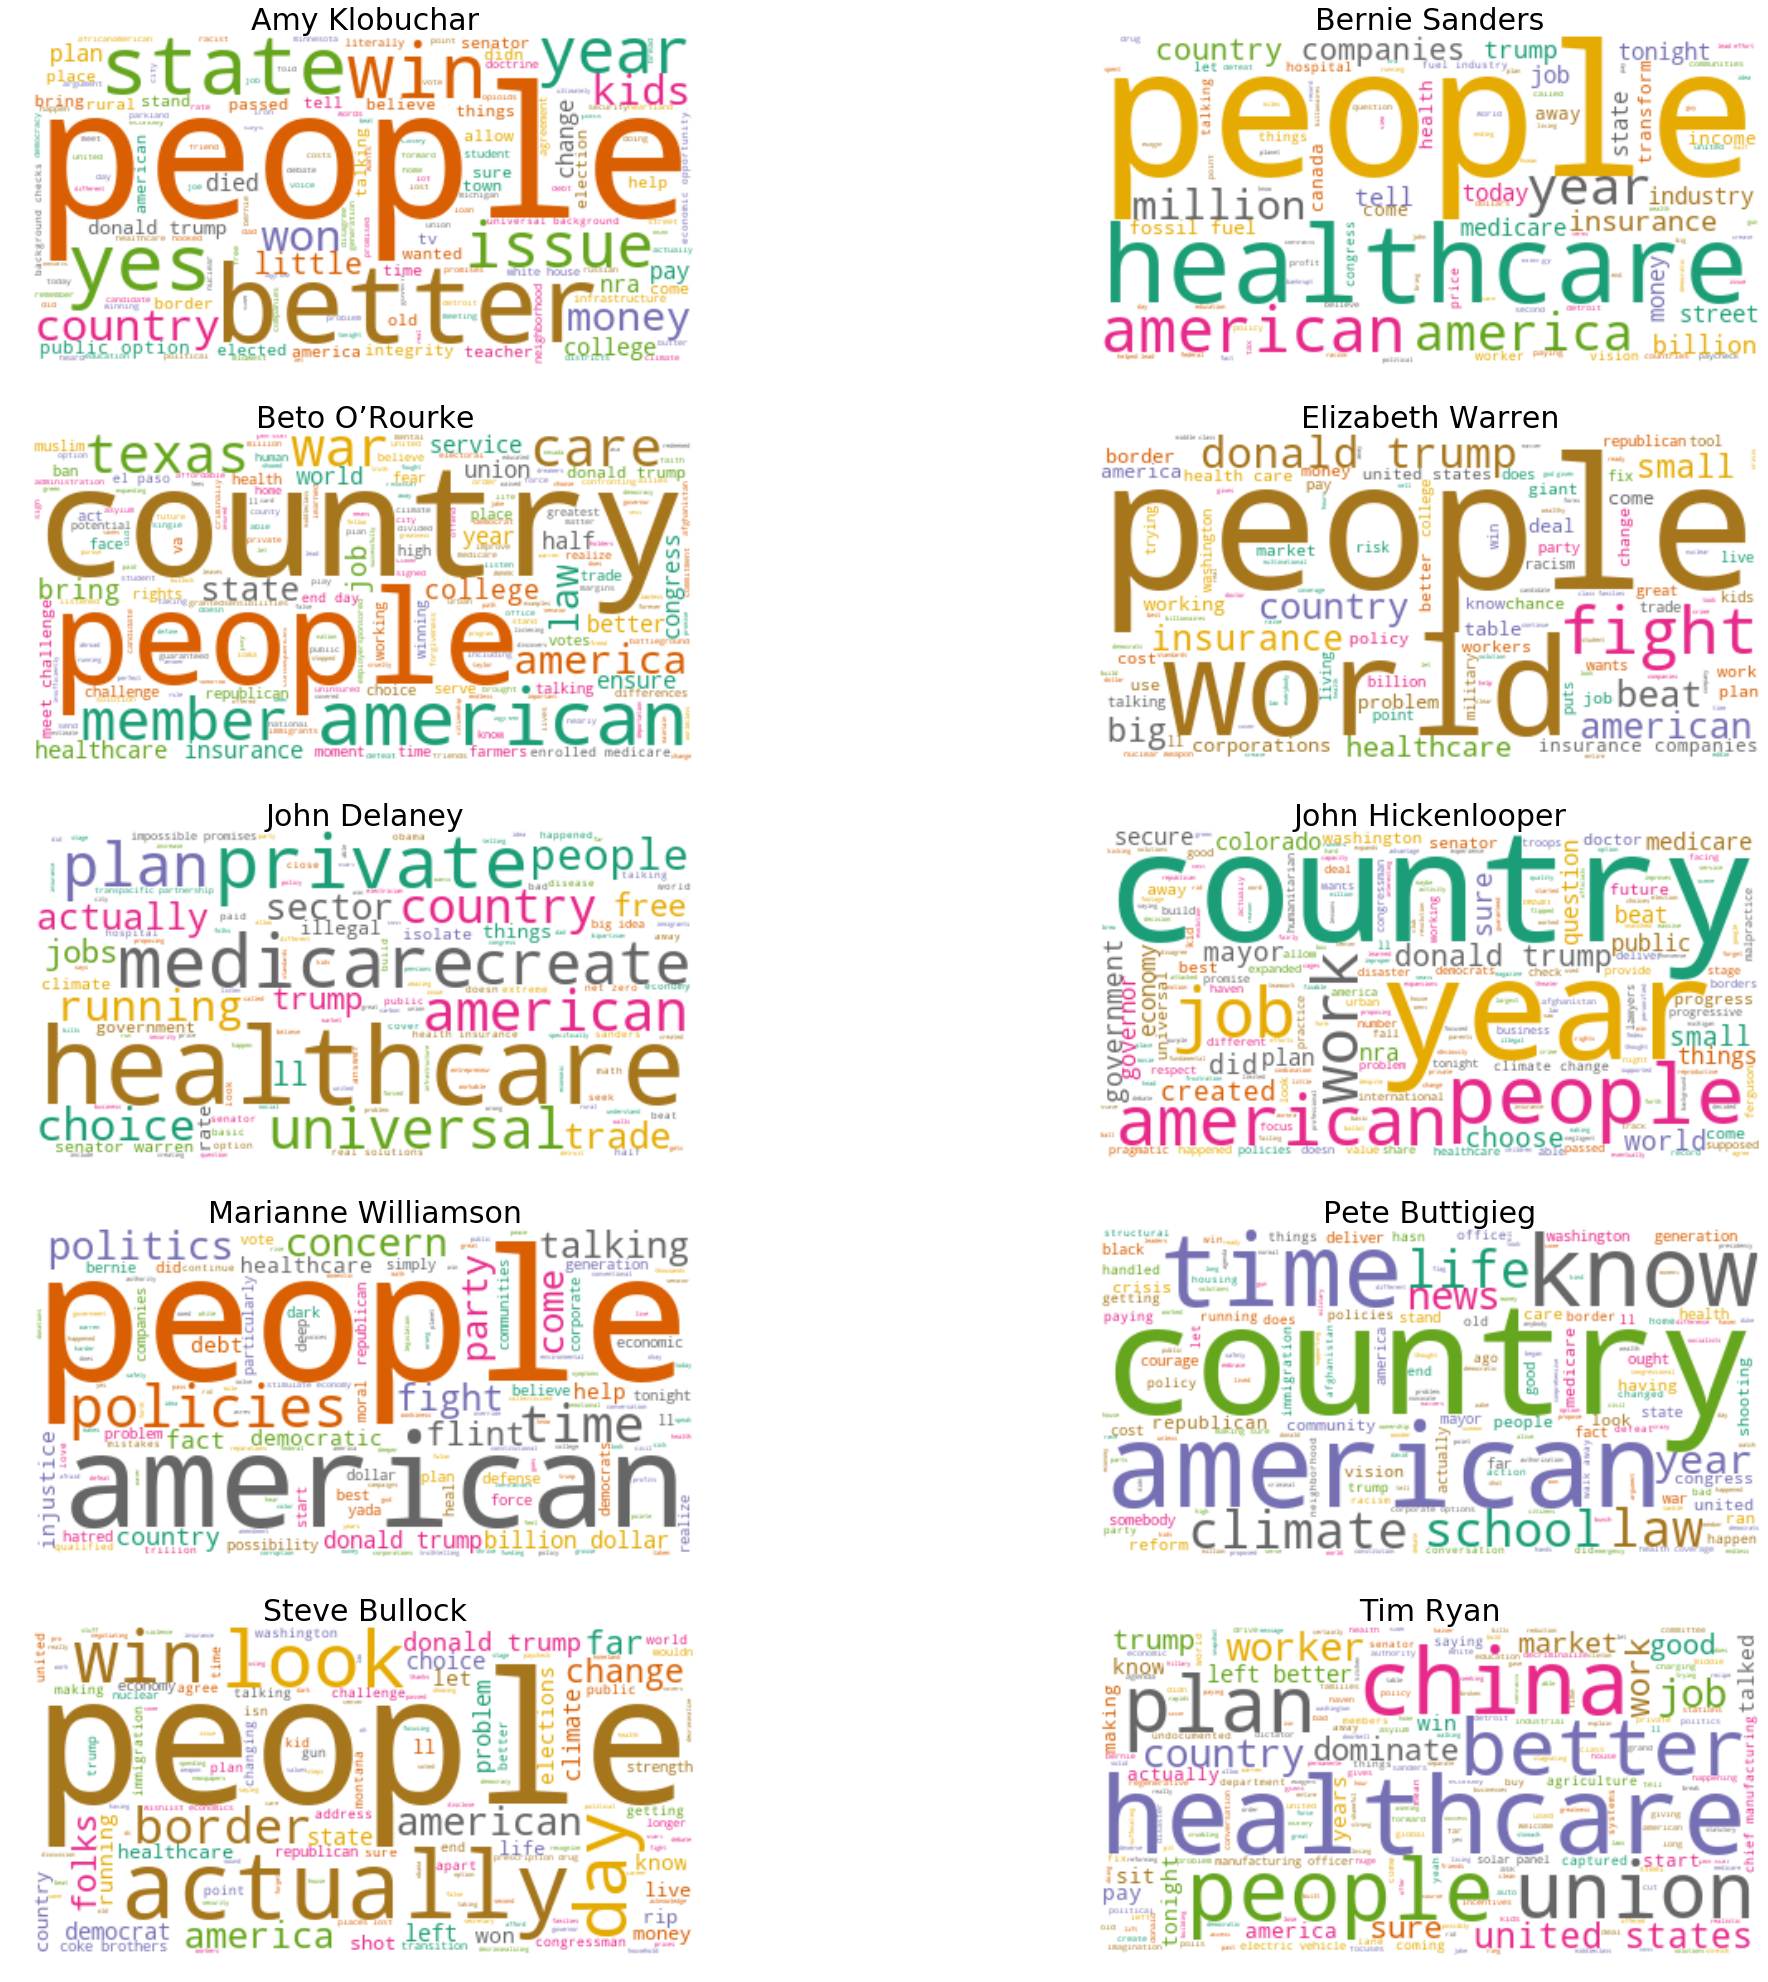

In [54]:
plt.rcParams['figure.figsize'] = [35, 50]

full_names = ['Amy Klobuchar', 'Bernie Sanders', 'Beto O’Rourke', 'Elizabeth Warren', 'John Delaney',
              'John Hickenlooper', 'Marianne Williamson', 'Pete Buttigieg', 'Steve Bullock', 'Tim Ryan']

# Create subplots for each comedian
for index, candidate in enumerate(DD1_dtm.columns):
    wc.generate(DD1_clean.Text[candidate])
    
    plt.subplot(7, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index], fontsize=30)
    
plt.show()

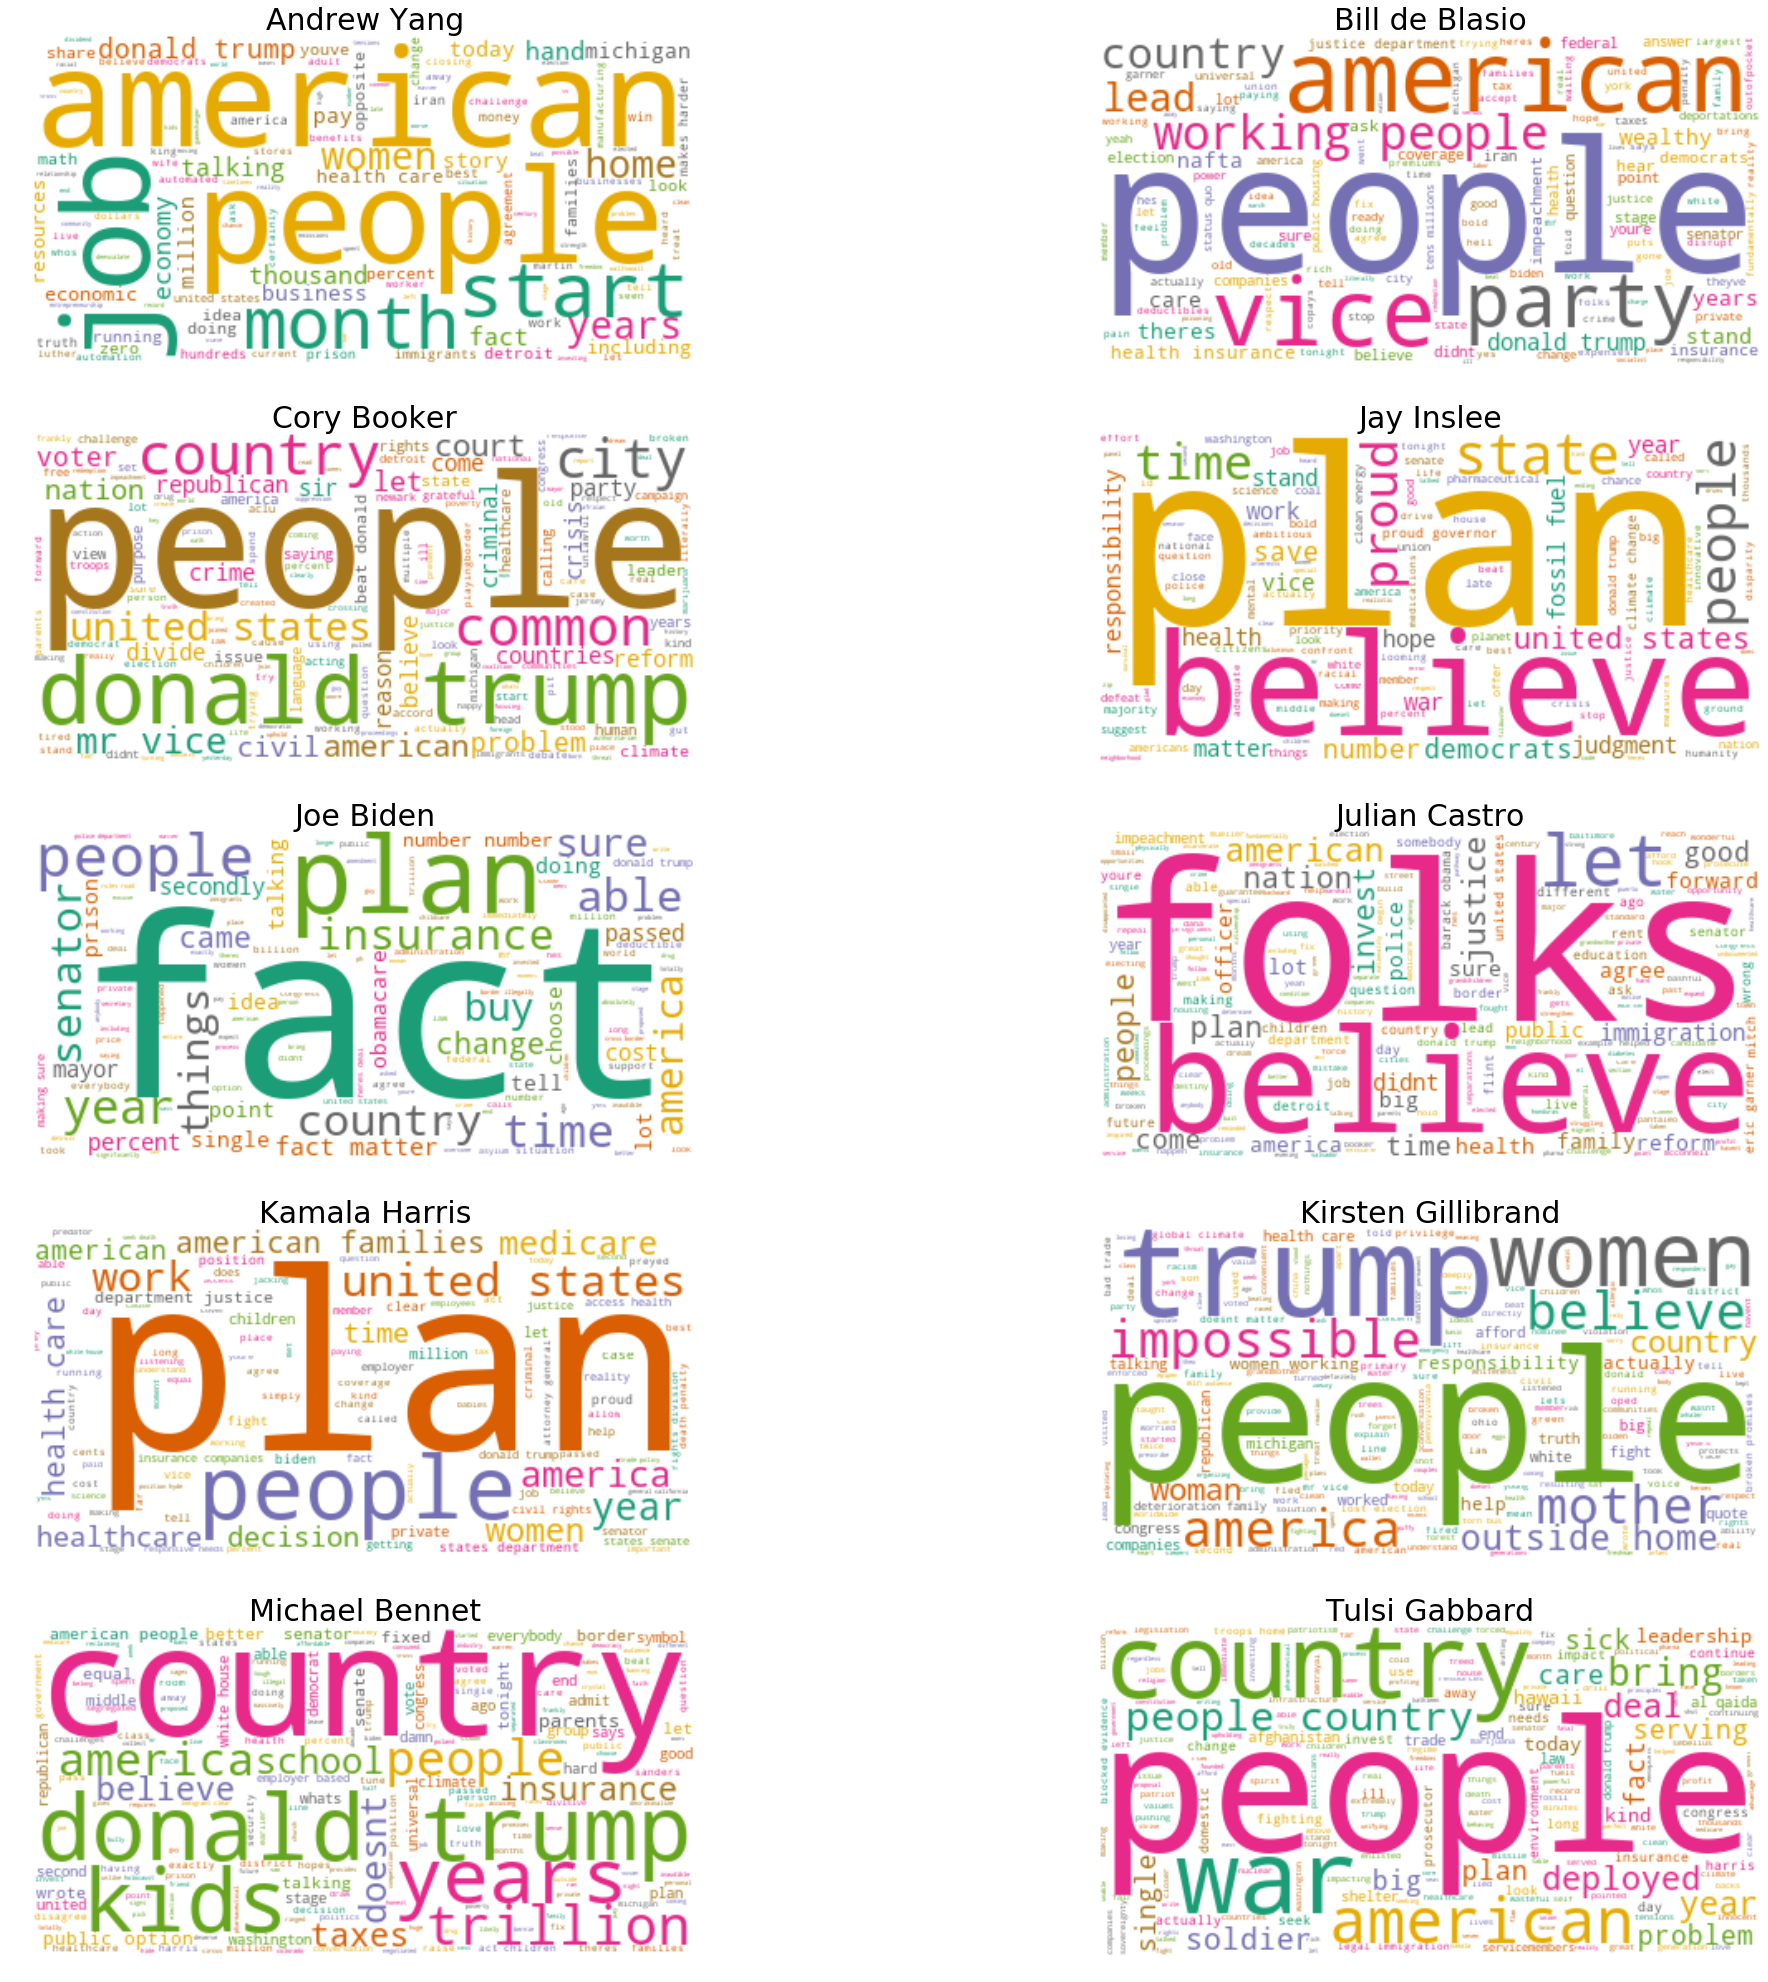

In [55]:
plt.rcParams['figure.figsize'] = [35, 50]

full_names = ['Andrew Yang', 'Bill de Blasio', 'Cory Booker', 'Jay Inslee', 'Joe Biden',
              'Julian Castro', 'Kamala Harris', 'Kirsten Gillibrand', 'Michael Bennet', 'Tulsi Gabbard']

# Create subplots for each comedian
for index, candidate in enumerate(DD2_dtm.columns):
    wc2.generate(DD2_clean.Text[candidate])
    
    plt.subplot(7, 2, index+1)
    plt.imshow(wc2, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index], fontsize=30)
    
plt.show()

## c. Discussion and Observations

The generated word clouds for both nights of the debate were quite fascinating to explore. The commonalities as well as the unique words or phrases. I’ll first out with their commonalities. 

### People

John Delaney and Julian Castro were the only candidates who did not have “people” as one of their top words. Given that Julian Castro’s most popular word is “folks” which is synonymous to “people”, which means John Delaney was the only candidate to not really use the word “people”. I see the popularity of the word “people” to the new rise of populism not just within the Democratic camp since the Bernie Sanders campaign but also the type of language around the Donald Trump campaign in 2016. The use of “people” could very much be playing on that energy of populism and grassroots movements. 

### Country

Beto O’Rouorke, Elizabeth Warren, John Delaney, John Hickenlooper, Pete Buttigieg, Joe Biden, Michael Bennet, and Tulsi Gabbard had the word “country” as one of their most popular words. “Country” can be associated with patriotism, civics, and the military. It’s no surprise that the candidates with the biggest use of “country”, Beto O’Rourke, Hickenlooper, Buttigieg and Gabbard, are associated with the military either through personal connection or through their tenure in office.

### Plan

“Plan” was a surprising word to shop up so often. John Delaney, Tim Ryan, Joe Biden, and Kamala Harris. It’s interesting that “She’s Got a Plan for That” Elizabeth Warren doesn’t use that word. It seems though that “plan” here is associated with moderate and centrist candidates and is being used as a way to demonstrate their pragmatic approach to US policy or the notion that things will be accomplished under them because they will have know-how. 

### Healthcare

“Healthcare”, “insurance”, “Medicare” are also popular words amongst the candidates Bernie Sanders, Elizabeth Warren, John Delaney, Tim Ryan, Bill de Blasio, Joe Biden, Kamala Harris, and Michael Bennet. It seems that for the Democratic contenders, healthcare is a major issue in this election. 

## d. Mentions of Trump

I'm curious to see how often candidates referred to Trump directly in their debate answers.

In [59]:
# borrowed from adashofdata
Trump_words_DD1 = DD1_dtm.transpose()[['trump']]
data_Trump_DD1 = pd.concat([Trump_words_DD1.trump], axis=1)
data_Trump_DD1.columns = ['Trump']
data_Trump_DD1

Trump
Name                      
Amy Klobuchar            4
Bernie Sanders           7
Beto O’Rourke            4
Elizabeth Warren        12
John Delaney             4
John Hickenlooper        5
Marianne Williamson      7
Pete Buttigieg           3
Steve Bullock            9
Tim Ryan                 5

In [60]:
# borrowed from adashofdata
Trump_words_DD2 = DD2_dtm.transpose()[['trump']]
data_Trump_DD2 = pd.concat([Trump_words_DD2.trump], axis=1)
data_Trump_DD2.columns = ['Trump']
data_Trump_DD2

Trump
Andrew Yang             7
Bill de Blasio          8
Cory Booker            11
Jay Inslee              2
Joe Biden               8
Julian Castro           5
Kamala Harris           6
Kirsten Gillibrand      8
Michael Bennet          9
Tulsi Gabbard           5

The candidates' mention of Trump ranged from 2 times to 12 times. The average number was 7 times during the debate. The top two candidates that mention Trump more than ten times are Elizabeth Warren and Cory Booker, which were on separate nights. The candidates who mentioned it the least were Pete Buttigieg and Jay Inslee also on separate nights.

### e. Next Steps

Here we did some EDA to glance over the candidates' most popular words and what that could mean for their brand as well as the race of the 2020 Election. 

I'm going to build a model to find relationships between the popularity of their words and their polling after the debates to see if there's a connection between the words candidates are using and what is resonating with US voters.